### 【問題1】100日目の米粒の数
```
100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。
また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を
折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）
```

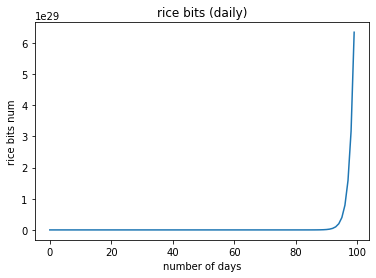

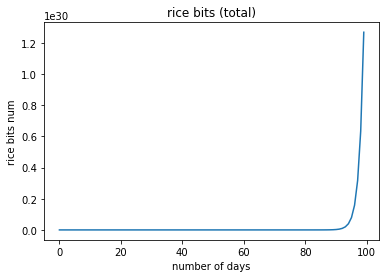

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

today_bit = 1
coef = 2
max_loop = 100-1 # 最初のループは代入で行う
total_bit = today_bit # 1日目
daily_bits = [today_bit]
total_bits = [today_bit]

for i in range(max_loop):
    today_bit *= coef
    total_bit += today_bit
    daily_bits.append(today_bit)
    total_bits.append(total_bit)

plt.title("rice bits (daily)")
plt.xlabel("number of days")
plt.ylabel("rice bits num")
plt.plot(daily_bits)
plt.show()

plt.title("rice bits (total)")
plt.xlabel("number of days")
plt.ylabel("rice bits num")
plt.plot(total_bits)
plt.show()

### 【問題2】100日目以外の米粒の数
```
この逸話は30日だったり81日だったりと日数が曖昧です。
どの話にも対応できるように日数を引数とした 関数 を作成しましょう。
関数を作成した上で、コース受講日数でいくつ米粒をもらえるかを答えてください。
問題1と同様に折れ線グラフも出力してください。
```

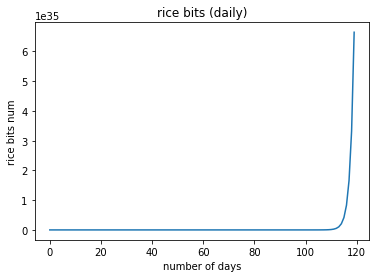

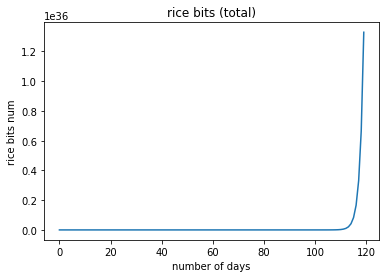

In [30]:
def plot_rice_bits(loop_num=100):
    """曽呂利新左衛門の米の逸話における、日にちごとの米の粒の数を計算する関数。
    Parameteres
    -----------
    loop_num: int
        米を貰う日数 (default : 100)
    Returns
    -------
    daily_bits : list
        ある日に貰う米の数のリスト (リストの長さはloop_numに等しい)
    total_bits : list
        ある日までに累計で貰う米の数のリスト (リストの長さはloop_numに等しい)
    """
    if loop_num < 2:
        return [], []
    today_bit = 1
    coef = 2
    max_loop = loop_num-1 # 最初のループは代入で行う
    total_bit = today_bit # 1日目
    daily_bits = [today_bit]
    total_bits = [today_bit]

    for i in range(max_loop):
        today_bit *= coef
        total_bit += today_bit
        daily_bits.append(today_bit)
        total_bits.append(total_bit)

    return daily_bits, total_bits

daily_bits, total_bits = plot_rice_bits(120)

plt.title("rice bits (daily)")
plt.xlabel("number of days")
plt.ylabel("rice bits num")
plt.plot(daily_bits)
plt.show()

plt.title("rice bits (total)")
plt.xlabel("number of days")
plt.ylabel("rice bits num")
plt.plot(total_bits)
plt.show()

### 【問題3】貰える米で何人が何日生活できるか
```
この米があれば何人が何日生活できるか計算する関数を作成してください。
コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。
関数名やコメントなどは分かりやすく考えて作成してください。


ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。

どう調べ、何を根拠にしたかもコメントを残しておいてください。
```

In [44]:
def calc(total_ricegrain, people_num):
    # ご飯 100g 4000粒 168kcal  とする
    # 168kcal / 4000＝0.042kcal
    # ご飯粒数 ソース: https://www.maff.go.jp/j/heya/sodan/1806/03.html
    #  カロリー ソース: googleで頭に出てくる計算ツール
    kcal_per_ricegrain = 0.042
    # 成人男性 1日に必要なカロリー 
    # ソース: https://www.maff.go.jp/j/syokuiku/zissen_navi/balance/required.html
    required_kcal = 2200
    # 成人男性が1日に必要な米粒 (切り捨て)
    required_ricegain = int(required_kcal / kcal_per_ricegrain)

    daily_cost = required_ricegain * people_num
    survival_days = int(total_ricegrain / daily_cost)
    print(f"required_cost: {required_ricegain} people: {people_num} daily_cost: {daily_cost} total_ricegrain: {total_ricegrain}")
    
    return survival_days
    
print("survival_days: {}".format(calc(1_000_000, 4)))

required_cost: 52380 people: 4 daily_cost: 209520 total_ricegrain: 1000000
survival_days: 4
